### Exploratory Data Analysis

**Objetivo:** Mi análisis va a estar orientado en las oportunidades de crecimiento en cuanto a la infraestructura y a la penetración. Para dicho análisis voy a utilizar del Dataset "Internet" y voy a analizar los siguientes aspectos:
- Comparación entre la cantidad de accesos por tecnología en cada provincia para detectar cuáles tienen una mayor y menor penetración de tecnologías más modernas o eficientes.
- Identificar provincias con baja cantidad de accesos por cada 100 habitantes para enfocar allí las oportunidades de crecimiento.

Como primer paso voy a importar el Dataset "Internet" para poder comenzar con el análisis. Unicamente voy a trabajar con tres de las 12 hojas que lo conforma según mis objetivos del análisis. Las hojas seleccionadas son:
- Hoja 3: accesos por provincia, partido y localidad por cada tipo de tecnología de acceso.
- Hoja 7: accesos por año, trimestre, provincia y tipo de tecnología.
- Hoja 8: accesos por cada 100 habitantes por provincia, año y trimestre.


In [9]:
# Importo librerías necesarias
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Importo el archivo "Internet" a partir de la funcion ExcelFile
dataset_internet = pd.ExcelFile("./Datasets/Internet.xlsx")

In [10]:
# Dataframes de las hojas que voy a utilizar

#Hoja 3
hoja_tres = pd.read_excel(dataset_internet, sheet_name=2)
hoja_tres.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [11]:
#Hoja 7
hoja_siete = pd.read_excel(dataset_internet, sheet_name=6)
hoja_siete.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [12]:
#Hoja 8
hoja_ocho = pd.read_excel(dataset_internet, sheet_name=7)
hoja_ocho.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


**Análisis del primer aspecto detallado:**

*Comparación entre la cantidad de accesos por tecnología en cada provincia para detectar cuáles tienen una mayor y menor penetración de tecnologías más modernas o eficientes.*

Voy a utilizar el dataframe creado a partir de la hoja 3.

In [14]:
hoja_tres

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3348,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3349,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0
3350,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0


In [15]:
# Relizo una copia del mismo
hoja_tres_copia = hoja_tres.copy()

Como primer paso para trabajar sobre dicho Dataframe voy a realizar una búsqueda de **valores faltantes.**

In [16]:
hoja_tres_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3352 non-null   int64 
 5   CABLEMODEM     3352 non-null   int64 
 6   DIAL UP        3352 non-null   int64 
 7   FIBRA OPTICA   3352 non-null   int64 
 8   OTROS          3352 non-null   int64 
 9   SATELITAL      3352 non-null   int64 
 10  WIMAX          3352 non-null   int64 
 11  WIRELESS       3352 non-null   int64 
 12  Total general  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


Podemos observar que existen datos faltantes. A partir de dicha información y de la observación del dataframe puedo detectar filas totalmente vacías por lo que voy a eliminarlas.

In [17]:
hoja_tres_copia = hoja_tres_copia.dropna(how='any')
hoja_tres_copia

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7422,0,0,0,0,7422
3068,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3069,TUCUMAN,Trancas,Villa de Trancas,90112030,95,0,0,0,33,0,0,71,199
3070,TUCUMAN,Yerba Buena,Villa Carmela,90119020,636,0,0,0,1,0,0,79,716


Luego de observar la información pude detectar que hay datos faltantes en las columnas Partido, Localidad y Link Indec. En Partido y Localidad hay celdas que contienen el str "OTROS" y en Link Indec contienen el str "Sin Datos". Lo voy a mostrar a continuación.

In [18]:
# Filtro las filas que tienen al menos algún dato faltante nombrado
filtrado = hoja_tres_copia[(hoja_tres_copia['Partido'] == 'OTROS') | (hoja_tres_copia['Localidad'] == 'OTROS') | (hoja_tres_copia['Link Indec'] == 'Sin Datos')]
filtrado

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
91,BUENOS AIRES,Bolívar,OTROS,Sin Datos,0,1,0,1,0,0,0,0,2
207,BUENOS AIRES,Ezeiza,OTROS,Sin Datos,3,1,0,5,0,0,0,0,9
245,BUENOS AIRES,General Lavalle,OTROS,Sin Datos,0,0,0,1,0,0,0,0,1
265,BUENOS AIRES,General Pueyrredón,OTROS,Sin Datos,0,0,0,151,0,0,0,0,151
274,BUENOS AIRES,General San Martín,OTROS,Sin Datos,11,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,Sin Datos,0,0,0,0,0,1,0,0,1
3000,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,Sin Datos,0,0,0,1,0,0,0,0,1
3001,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,Sin Datos,0,0,0,1,0,0,0,0,1
3003,TUCUMAN,Burruyacú,OTROS,Sin Datos,0,0,0,0,0,1,0,0,1


Para analizar la cantidad de accesos por tecnología en cada provincia no afecta el hecho de que existan dichos datos faltantes por lo que no voy a eliminar las filas que los contienen.

A continuación voy a realizar una búsqueda de **valores duplicados.** Voy a hacerlo en base a las primeras 4 columnas ya que considero que son las columnas que no deberían haber valores repetidos.

In [19]:
# Converto la columna 'link indec' a int
hoja_tres_copia['Link Indec'] = pd.to_numeric(hoja_tres_copia['Link Indec'], errors='coerce')

In [20]:
# Elimino espacios en blanco de las columnas de tipo object
hoja_tres_copia['Provincia'] = hoja_tres_copia['Provincia'].str.strip()
hoja_tres_copia['Partido'] = hoja_tres_copia['Partido'].str.strip()
hoja_tres_copia['Localidad'] = hoja_tres_copia['Localidad'].str.strip()

# Convierto a minúsculas las columnas de tipo string
hoja_tres_copia['Provincia'] = hoja_tres_copia['Provincia'].str.lower()
hoja_tres_copia['Partido'] = hoja_tres_copia['Partido'].str.lower()
hoja_tres_copia['Localidad'] = hoja_tres_copia['Localidad'].str.lower()

# Filtro las filas que tienen valores duplicados en las columnas especificadas
hoja_tres_duplicados = hoja_tres_copia[hoja_tres_copia.duplicated(subset=['Provincia', 'Partido', 'Localidad', 'Link Indec'], keep=False)]

print(hoja_tres_duplicados)

Empty DataFrame
Columns: [Provincia, Partido, Localidad, Link Indec, ADSL, CABLEMODEM, DIAL UP, FIBRA OPTICA, OTROS, SATELITAL, WIMAX, WIRELESS, Total general]
Index: []


Podemos observar que no existen valores duplicados.

Voy a analizar la existencia de **outliers**, para ello, voy a calcular el  Z-score.

In [21]:
# Importo librería necesaria
import numpy as pd

# Filtro las columnas de tecnologías
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Calculo el Z-score para cada tecnología
df_zscore = hoja_tres_copia[tecnologias].apply(lambda x: (x- x.mean()) / x.std())

# Defino umbral de Z-score para detectar outliers
threshold = 3
outliers = df_zscore[(df_zscore > threshold) | (df_zscore < -threshold)].dropna(how='all')
outliers


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,NaN,NaN,NaN,NaN,NaN,54.444941,NaN,NaN
58,NaN,4.451508,8.896387,NaN,NaN,NaN,NaN,3.420611
76,NaN,NaN,NaN,3.156961,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.017186
146,NaN,NaN,NaN,NaN,NaN,NaN,29.351296,NaN
...,...,...,...,...,...,...,...,...
2728,5.291733,7.136385,NaN,20.641220,NaN,NaN,NaN,6.687951
2894,NaN,3.324487,NaN,NaN,NaN,NaN,NaN,NaN
2995,3.692016,NaN,3.037424,NaN,NaN,NaN,NaN,NaN
2998,NaN,NaN,3.847952,NaN,NaN,NaN,NaN,NaN


*Análisis del resultado:* Las celdas que tienen NaN no tienen outliers. Esto es porque dichos valores no superan el umbral definido para considerar un valor como outlier. Por otro lado, los valores que están muy alejados de la media son aquellos que sí tienen un valor y son considerados outliers. Antes de tomar una desición respecto a los mismos, voy a analizar el contexto de dichos otuliers. Para ello voy a filtrar las provincias.

In [22]:
# Filtro las filas originales de hoja_tres_copia que corresponden a los outliers detectados
outliers_indices = outliers.index
df_outliers = hoja_tres_copia.loc[outliers_indices]

# Muestro los outliers encontrados en las columnas de Provincia, Partido, Localidad y ecnologías
df_outliers = df_outliers[['Provincia', 'Partido', 'Localidad'] + tecnologias]
df_outliers

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS
0,buenos aires,25 de mayo,25 de mayo,755,4600,0,2,0,742,0,727
58,buenos aires,bahía blanca,bahía blanca,3774,103360,388,14732,64,8,0,2764
76,buenos aires,berazategui,berazategui,247,16915,38,29387,23,4,0,49
123,buenos aires,carlos casares,carlos casares,1167,2,7,3056,0,0,0,2461
146,buenos aires,chascomús,manuel j. cobo (est. lezama),98,2000,0,2,0,0,444,0
...,...,...,...,...,...,...,...,...,...,...,...
2728,santa fe,rosario,rosario,8813,164525,71,184903,152,2,0,5218
2894,santiago del estero,capital,santiago del estero,3196,77685,2,17294,1,5,0,1708
2995,tierra del fuego,río grande,río grande,6225,23991,135,2437,1,13,0,4
2998,tierra del fuego,ushuaia,ushuaia,2881,24014,170,1243,3,5,0,109


In [23]:
# Obtengo los valores únicos de la columna Provincia
provincias_unicas = df_outliers['Provincia'].unique()

print("Provincias únicas con outliers:")
print(provincias_unicas)

Provincias únicas con outliers:
['buenos aires' 'caba' 'catamarca' 'chaco' 'chubut' 'cordoba' 'corrientes'
 'entre rios' 'formosa' 'jujuy' 'la pampa' 'mendoza' 'misiones' 'neuquen'
 'rio negro' 'salta' 'san juan' 'san luis' 'santa cruz' 'santa fe'
 'santiago del estero' 'tierra del fuego' 'tucuman']


Voy a visualizar los outliers por provincia en un gráfico que compare los accesos por tecnología para obtener una visión mas clara. Utilizaré un gráfico de dispersión.

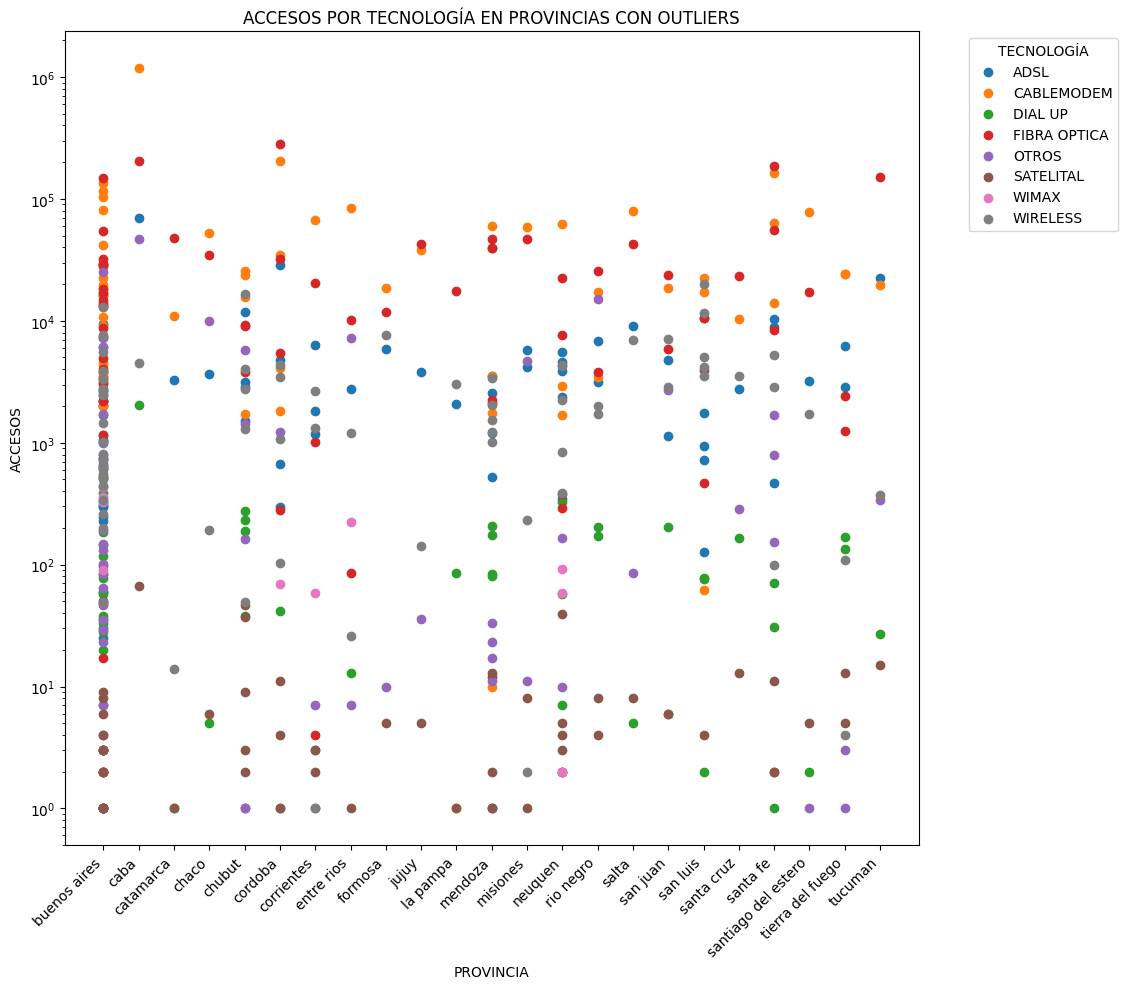

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)

for col in tecnologias:
    plt.scatter(df_outliers['Provincia'], df_outliers[col], label=col)
    
plt.yscale('log')
plt.title('ACCESOS POR TECNOLOGÍA EN PROVINCIAS CON OUTLIERS')
plt.xlabel('PROVINCIA')
plt.ylabel('ACCESOS')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TECNOLOGÍA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Respecto a los valores atípicos se observa que Buenos Aires (especiamente) y una zona de ella, CABA, tienen un número mucho mayor de accesos en varias tecnologías (especialmente en ADSL y CABLEMODEM) en comparación con otras provincias, lo que los destaca como outliers claros. Esto puede deberse a la densidad de la población y la infraestructura de telecomunicaciones más avanzada en estas zonas metropolitanas. También se aprecian algunos outliers en provincias como Córdoba y Santa Fe, donde el número de accesos a tecnologías específicas es signficativamente mayor que el resto de las provincias.

Las causas de los outliers se deben a factores estructurales importantes, como la alta densidad de la población en estas provincias o la mayor inversión en infraestructura, por ende, sería ideal mantener estos datos ya que reflejan la realidad del mercado de acceso a internet en Argentina.

Para terminar de tomar la desición voy a realizar un análisis con la media y la desviación estándar. Voy a calcularlas con y sin los outliers y los voy a comparar. 

In [25]:
# Calculo la media y desviación estándar con los outliers
media_con_outliers = hoja_tres_copia[tecnologias].mean()
desviacion_con_outliers = hoja_tres_copia[tecnologias].std()

# Elimino las filas con outliers utilizando los índices almacenados en outliers_indices
df_sin_outliers = hoja_tres_copia.drop(outliers_indices)

# Calculo la media y desviación estándar sin los outliers
media_sin_outliers = df_sin_outliers[tecnologias].mean()
desviacion_sin_outliers = df_sin_outliers[tecnologias].std()

print("Media con outliers:\n", media_con_outliers)
print("\nMedia sin outliers:\n", media_sin_outliers)

Media con outliers:
 ADSL             252.107747
CABLEMODEM      1948.879232
DIAL UP            3.838867
FIBRA OPTICA    1306.999023
OTROS             78.460286
SATELITAL          0.953776
WIMAX              0.712240
WIRELESS         194.883464
dtype: float64

Media sin outliers:
 ADSL            145.254679
CABLEMODEM      926.842580
DIAL UP           1.415775
FIBRA OPTICA    693.488971
OTROS            32.358957
SATELITAL         0.570187
WIMAX             0.009358
WIRELESS        131.834893
dtype: float64


In [26]:
print("\nDesviación estándar con outliers:\n", desviacion_con_outliers)
print("\nDesviación estándar sin outliers:\n", desviacion_sin_outliers)


Desviación estándar con outliers:
 ADSL             1617.786217
CABLEMODEM      22781.297686
DIAL UP            43.181703
FIBRA OPTICA     8894.629351
OTROS            1057.810117
SATELITAL          13.610929
WIMAX              15.102835
WIRELESS          751.069544
dtype: float64

Desviación estándar sin outliers:
 ADSL             438.296634
CABLEMODEM      3772.550244
DIAL UP            8.415346
FIBRA OPTICA    2328.610048
OTROS            171.919984
SATELITAL          1.447540
WIMAX              0.346805
WIRELESS         284.085662
dtype: float64


A continuación, voy a hacer dos visualizaciones, una con outliers y otra sin outliers.

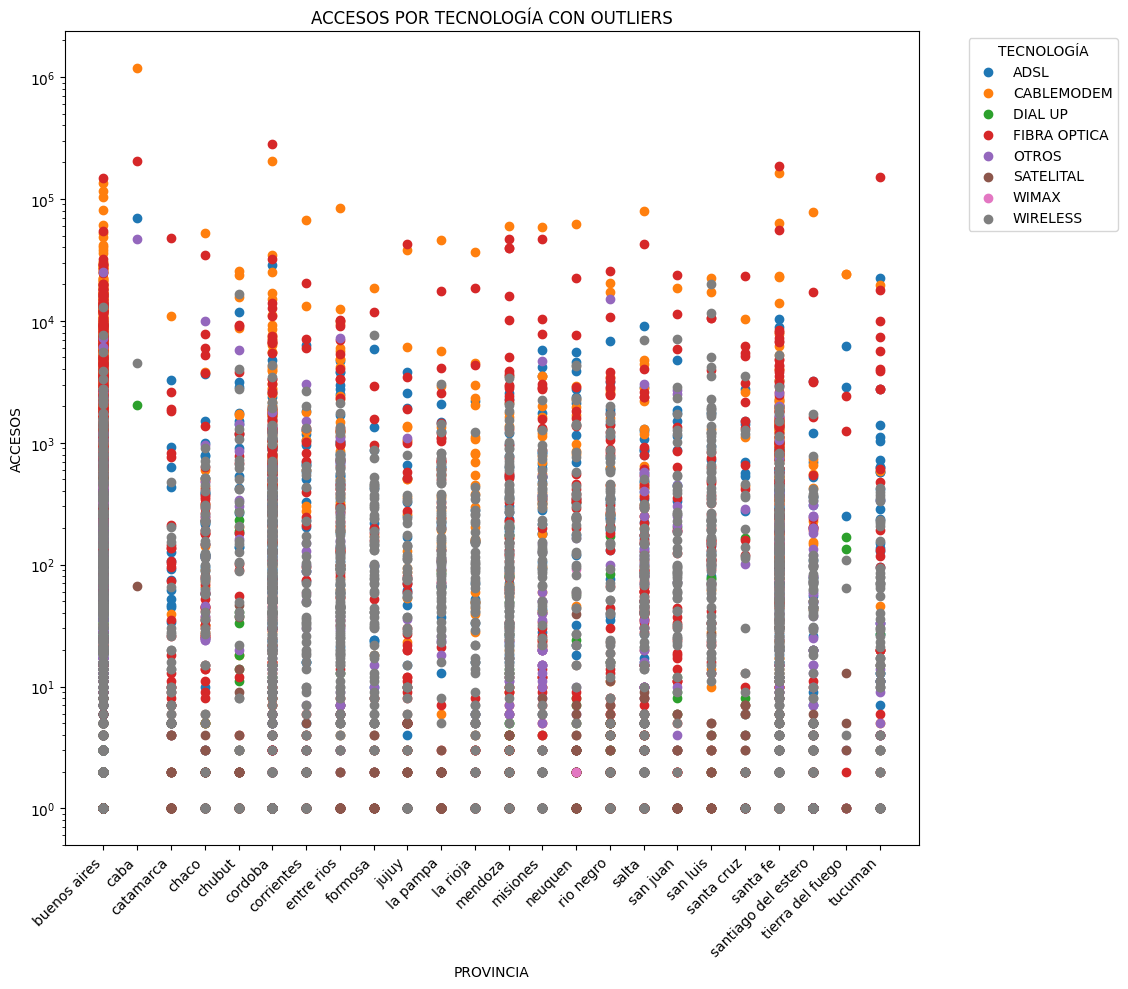

In [27]:
# Con outliers
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)

for col in tecnologias:
    plt.scatter(hoja_tres_copia['Provincia'], hoja_tres_copia[col], label=col)
    
plt.yscale('log')
plt.title('ACCESOS POR TECNOLOGÍA CON OUTLIERS')
plt.xlabel('PROVINCIA')
plt.ylabel('ACCESOS')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TECNOLOGÍA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

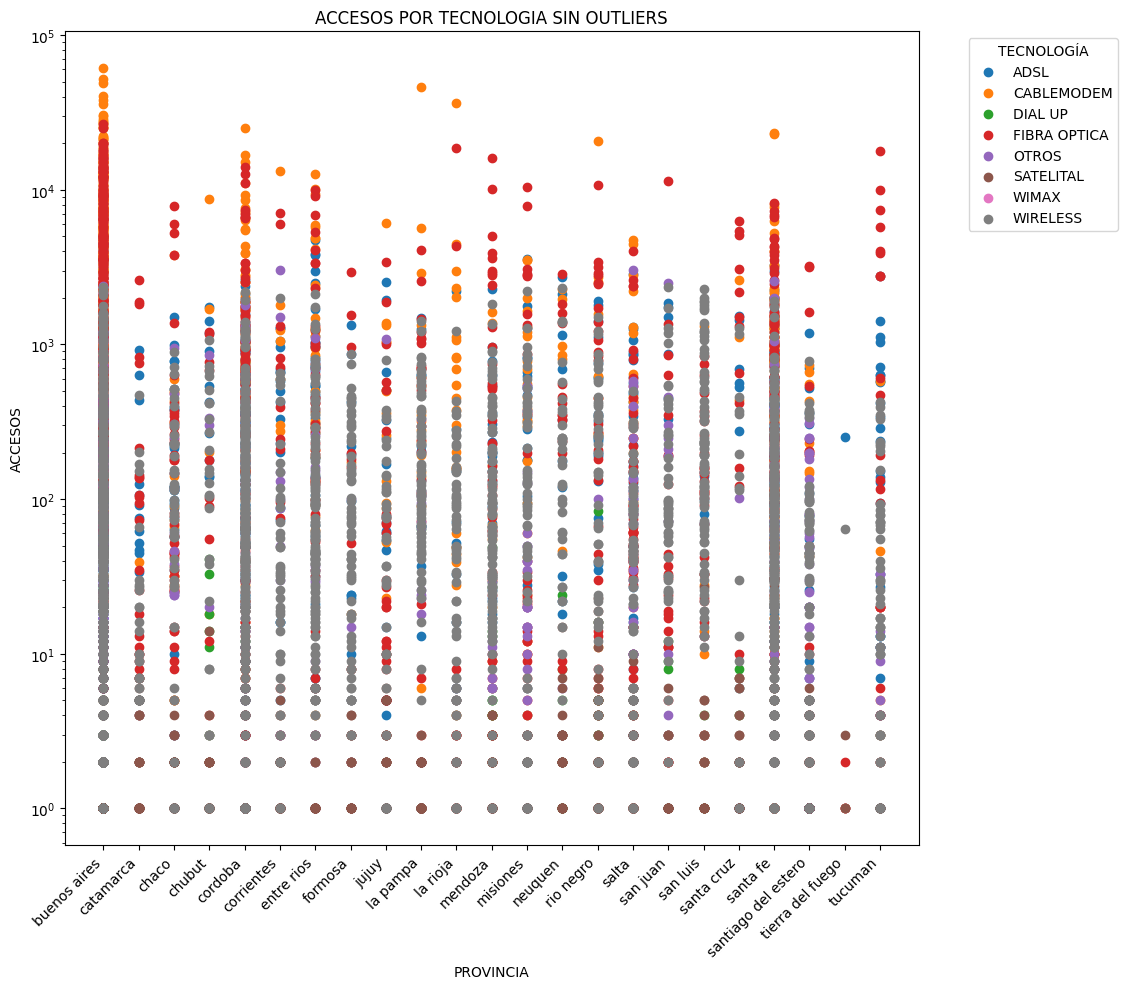

In [28]:
# Gráfico sin outliers
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 2)

for col in tecnologias:
    plt.scatter(df_sin_outliers['Provincia'], df_sin_outliers[col], label=col)

plt.yscale('log')
plt.title('ACCESOS POR TECNOLOGIA SIN OUTLIERS')
plt.xlabel('PROVINCIA')
plt.ylabel('ACCESOS')
plt.xticks(rotation=45, ha='right')
plt.legend(title='TECNOLOGÍA', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

*Conclusiones*: Si bien al calcular la media y la desviación estándar en ambos casos se muestran cambios significativos en dichos valores, al observar los gráficos podemos notar que no distorsionan la información. 
El gráfico con otliers muestra un rango mucho más amplio en la cantidad de accesos por tecnología, como Buenos Aires y CABA destacándose con accesos significativamente mayores en varias de las tecnologías. Esto refleja probablemente la mayor inversión en infraestructura y la alta densidad de la población en dichas áreas.
El gráfico sin outliers muestra a los accesos mas nivelados y las diferencias entre provincias se reducen considerablemente. Esto podría ayudar a identificar provincias con niveles de accesos mas homogéneos pero no refleja completamente la realidad de los accesos en regiones más pobladas.
En consecuencia, voy a dejar los valores atípicos ya que reflejan la realidad de mercado de internet en Argentina y no distorsionan la información y voy a analizar en más profundidad los datos para lograr mi objetivo de análisis.

Voy a visualizar y analizar los datos para poder identificar insights relevantes. Voy a crear un Violinplot.

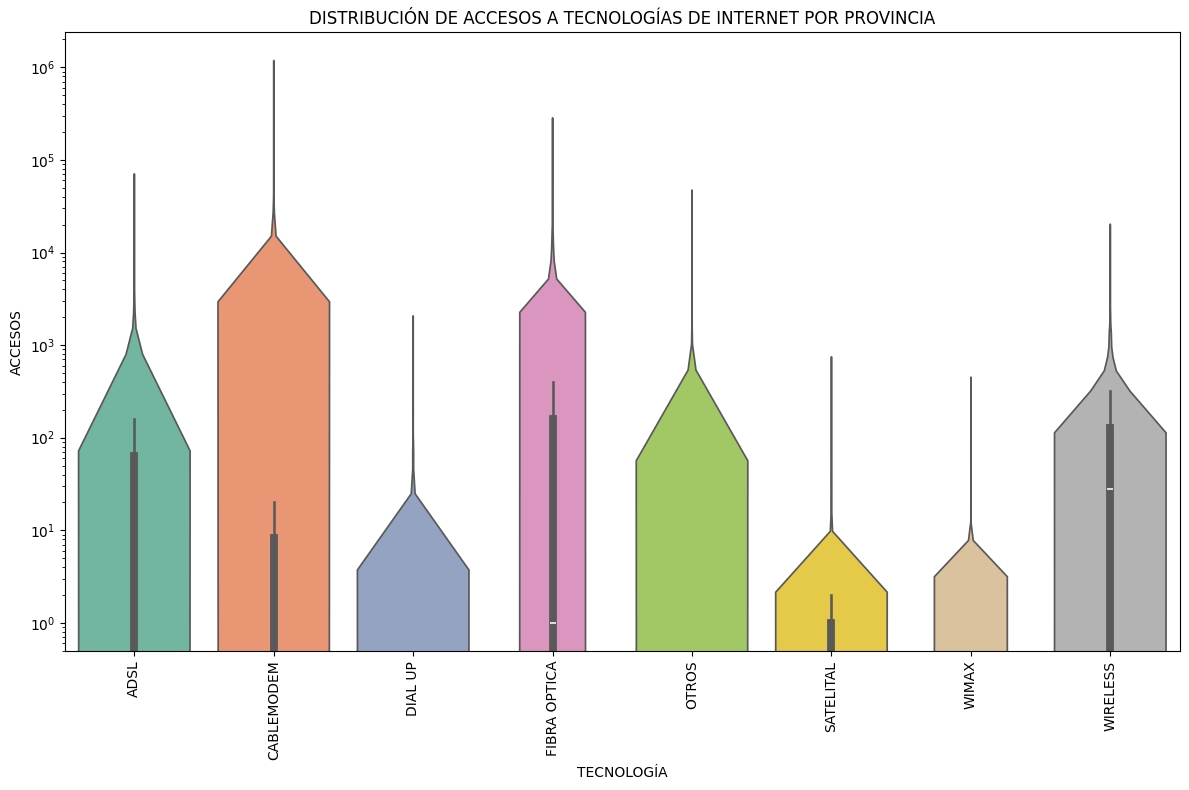

In [29]:
# transformo el dataframe para que sea más fácil de graficar
df_melted = hoja_tres_copia.melt(id_vars='Provincia', value_vars=tecnologias, 
                                   var_name='TECNOLOGÍA', value_name='ACCESOS')

palette = sns.color_palette("Set2", n_colors=len(tecnologias))

plt.figure(figsize=(12, 8))
sns.violinplot(x='TECNOLOGÍA', y='ACCESOS', data=df_melted, scale="width", palette=palette)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('DISTRIBUCIÓN DE ACCESOS A TECNOLOGÍAS DE INTERNET POR PROVINCIA')
plt.tight_layout()
plt.show()

*Conclusiones:* 
- *Variabilidad de accesos:* Las tecnologías como ADSL, Cablemodem y Fibra Óptica tienen una gran variabilidad en la cantidad de accesos, lo cual sugiere que en algunas provincias hay muchas más conexiones que en otras. Tecnologías como Satelital y WiMAX tienen menor variabilidad y parecen tener un número de accesos mucho más reducido en comparación con otras tecnologías. 

- *Tecnologías predominantes:* Cablemodem, Fibra Óptica y ADSL parecen ser las tecnologías con mayor cantidad de accesos. Esto puede indicar que estas son las opciones preferidas por los usuarios y pueden considerarse como las más accesibles y disponibles. En contraste, Dial Up y WiMAX tienen menor cantidad de accesos, lo que podría indicar que son tecnologías en desuso o con menor cobertura.

- *Distribución de accesos:* Se puede observar que tecnologías como ADSL y Fibra Óptica tienen una distribución más anchas en la parte baja del gráfico, lo que sugiere que hay muchas provincias con un número bajo de accesos a estas tecnologías. La distribución de Cablemodem muestra un grosor mayor en niveles de accesos más altos, lo que sugiere una mayor concentración de accesos a esta tecnología en ciertas provincias. 

- *Tecnologías emergentes vs tradicionales:* Fibra Óptica parece tener un crecimiento notable, aunque aún no es tan predominante como Cablemodem o ADSL. Dado que la fibra óptica suele ofrecer mejores velocidades y calidad de servicio, esto sugiere una oportunidad de crecimiento para la empresa en provincias donde su penetración aún es baja.

- *Oportunidades de expansión:* Tecnologías como Wireless y WiMAX tienen una distribución baja y restringida. Esto podria sugerir que hay oportunidades para aumentar la oferta de servicios inalámbricos en ciertas áreas rurales o de difícil acceso, donde la instalación de infraestructura física es complicada.

- *Otras tecnologías:* muestra una distribución relativamente amplia, lo que podría indicar la presencia de otras tecnologías específicas para ciertas regiones. Analizar más a fondo esta categoría podría proporcionar información útil sobre alternativas tecnológicas o mercados de nicho.

Para complementar dicha información voy a realizar un mapa de calor que muestre la distribución de accesos a tecnologías por provincia.

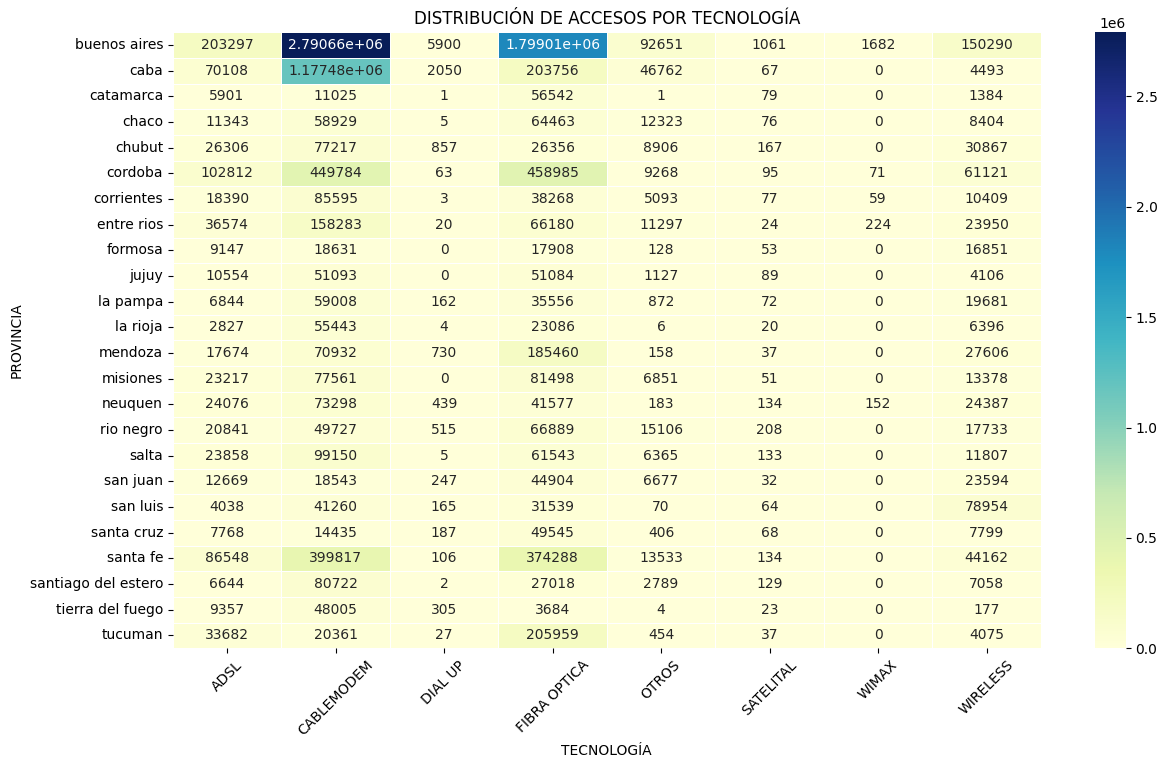

In [30]:
# Agrupo por provincia y sumo los accesos de cada tecnología
df_grouped = hoja_tres_copia.groupby('Provincia')[tecnologias].sum()

plt.figure(figsize=(14, 8))
sns.heatmap(df_grouped, annot=True, cmap="YlGnBu", fmt="g", linewidths=.5)
plt.title("DISTRIBUCIÓN DE ACCESOS POR TECNOLOGÍA")
plt.xlabel("TECNOLOGÍA")
plt.ylabel("PROVINCIA")
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

*Conclusiones:*
- ¨*Provincias con mayor cantidad de accesos:* Buenos Aires y una zona en particular de la misma, CABA, es la provincia con mayor cantidad de accesos en casi todas las tecnologías, especialmente en Cablemodem y Fibra Óptica.

- *Provincias con acceso limitado a ciertas tecnologías:* Provincias como Catamarca, La Rioja y Santiago del Estero muestran una cantidad significativamente menor en accesos en tecnologías modernas como Fibra Óptica, lo que indica una oportunidad para mejorar la infraestructura y el servicio en estas regiones.

- *Tecnologias predominantes:* Cablemodem y Fibra Óptica son las tecnologías predominantes en la mayoría de las provincias, mientras que Dial Up tiene muy pocos accesos, lo cual confirma su absolescencia. 

- *Presencia de tecnologías alternativas:* Tecnologías como Satelital y WiMAX tienen accesos bajos en casi todas las provincias, sugiriendo que son utilizadas como opciones alternativas en regiones donde las tecnologías cableadas o de fibra óptica no están disponibles. 

**Insights basados en las visualizaciones generadas:**
- *Identificación de oportunidades de mercado:* la baja penetración de tecnologías modernas como Fibra Óptica en provincias como Catamarca, La Rioja y Santiago del Estero indica una oportunidad de crecimiento para la empresa en estas regiones. Se puede proponer una expansión de infraestructura en estas provincias para cubrir la demanda potencial y mejorar la conectividad.

- *Estrategia de diferenciación tecnológica:* Dado que Cablemodem es la tecnología predominante en casi todas las provincias, hay una oportunidad para la empresa de diferenciarse ofreciendo Fibra Óptica, que ofrece mayores velocidades y estabilidad, en áreas donde aún no tiene presencia significativa, como Jujuy y Formosa. 

- *Optimización del portafolio de tecnologías:* El uso limitado de tecnologías como WiMAX y Satelital sugiere que estas no están cubriendo necesidades de forma efectiva en la mayoría de las provincias. Podría ser recomendable evaluar la inversión en estas tecnologías y enfocarse en alternativas que permitan mejorar la relación costo-beneficio en estas regiones.

- *Identificación de saturación en el mercado:* Las provincias de Buenos Aires y en una zona específica de esta, CABA, muestran una saturación en todas las tecnologías. En lugar de competir en estas áreas maduras, la empresa podría enfocarse en la retención de clientes mediante mejoras en la calidad de servicio, y explorar nuevas regiones con menor competencia para su expansión. 

**Analisis del segundo aspecto detallado:**

*Identificar provincias con baja cantidad de accesos por cada 100 habitantes para enfocar allí las oportunidades de crecimiento.*

Para estudiar este aspecto voy a utilizar el Dataframe creado con la hoja 8 del Dataset "Internet".
Comenzaré realizado la búsqueda de datos faltantes, seguido de valores duplicados y por último outliers.

In [31]:
hoja_ocho

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.800000
1,2024,1,Capital Federal,48.780000
2,2024,1,Catamarca,17.500000
3,2024,1,Chaco,12.480000
4,2024,1,Chubut,26.020000
...,...,...,...,...
979,2014,1,Santa Cruz,8.677327
980,2014,1,Santa Fe,15.077801
981,2014,1,Santiago Del Estero,4.058899
982,2014,1,Tierra Del Fuego,19.104921


In [32]:
# Verifico la cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna en hoja_ocho:")
print(hoja_ocho.isnull().sum())

Cantidad de valores nulos por columna en hoja_ocho:
Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64


No existen datos faltantes.

In [33]:
# Verifico duplicados
print("Cantidad de duplicados en hoja_ocho:")
print(hoja_ocho.duplicated().sum())

Cantidad de duplicados en hoja_ocho:
0


No existen valores duplicados.

In [34]:
# Calculo el Z-Score
hoja_ocho['z_score'] = (hoja_ocho['Accesos por cada 100 hab'] - hoja_ocho['Accesos por cada 100 hab'].mean()) / hoja_ocho['Accesos por cada 100 hab'].std()

# Defino umbral para identificar outliers (Z-Score > 3 o < -3)
outliers_z = hoja_ocho[abs(hoja_ocho['z_score']) > 3]
print(f"\nCantidad de outliers detectados con Z-Score: {len(outliers_z)}")


Cantidad de outliers detectados con Z-Score: 39


Realizaré un Scatterplot resaltando outliers por provincia. 

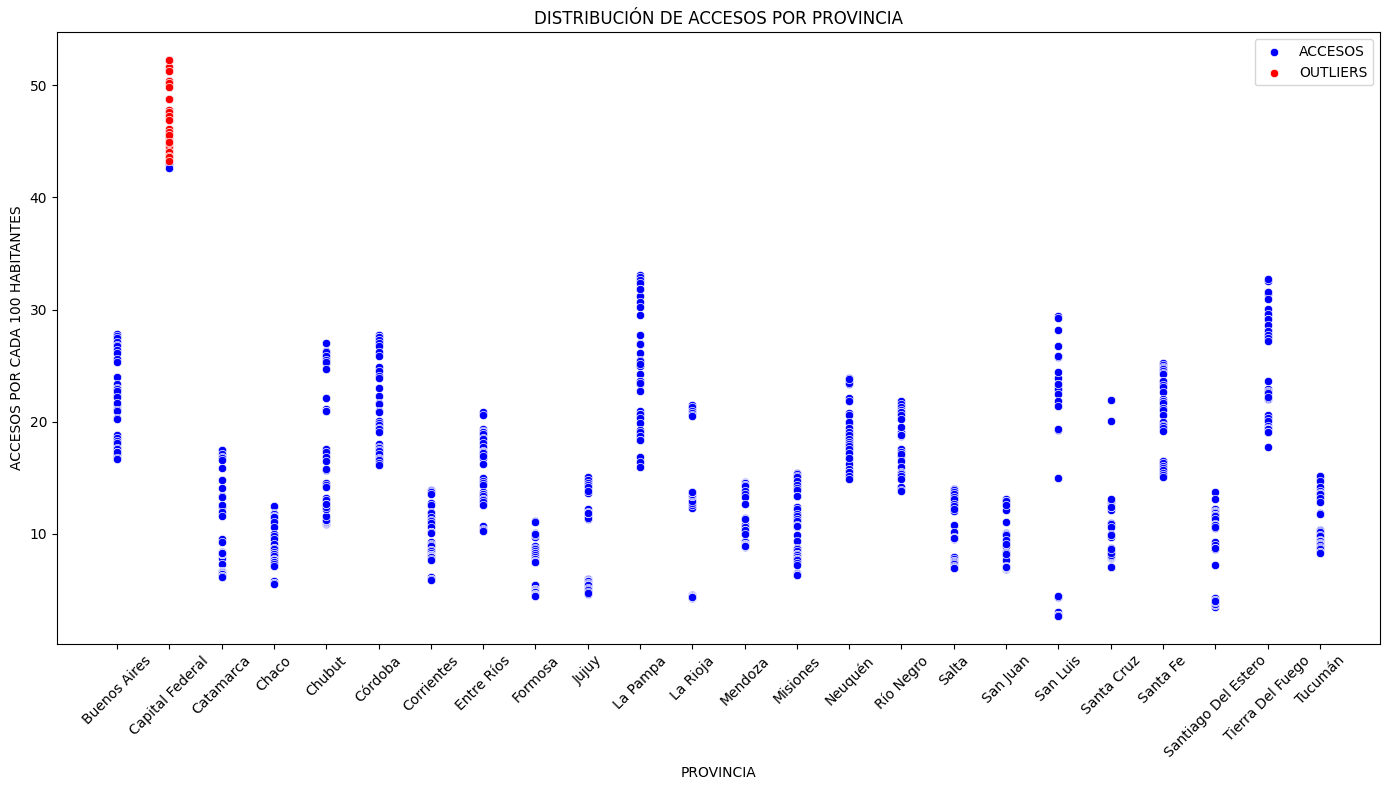

In [35]:
plt.figure(figsize=(14, 8))

sns.scatterplot(x='Provincia', y='Accesos por cada 100 hab', data=hoja_ocho, color='blue', label='ACCESOS')
sns.scatterplot(x='Provincia', y='Accesos por cada 100 hab', data=outliers_z, color='red', label='OUTLIERS')

plt.title('DISTRIBUCIÓN DE ACCESOS POR PROVINCIA')
plt.xticks(rotation=45)
plt.xlabel('PROVINCIA')
plt.ylabel('ACCESOS POR CADA 100 HABITANTES')
plt.legend()
plt.tight_layout()

plt.show()

*Interpretación:*
- Capital Federal es la ciudad con el mayor número de outliers. Estos puntos rojos indican que hay accesos por cada 100 habitantes significativamente más altos en comparación con otras provincias. Los valores de outliers en dicha zona se encuentran alrededor de 50 accesos por cada 100 habitantes, lo cual está muy por encima del promedio de las demás provincias. Buenos Aires también tiene un pequeño grupo de outliers aunque están más concentrados que los de Capital Federal.


Para complementar dicha información voy a realizar un Histograma de la distribución de accesos por cada 100 habitantes.

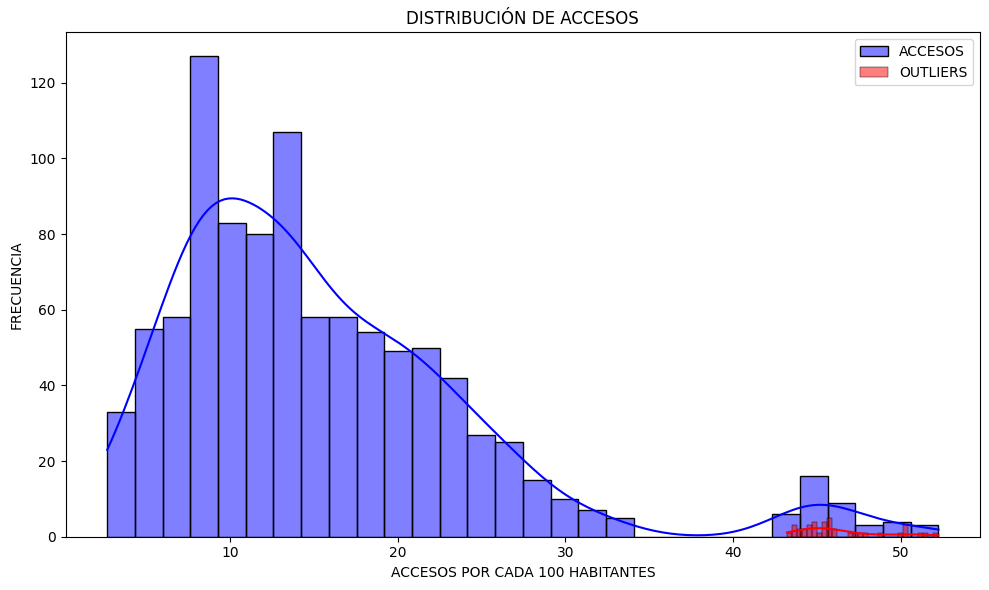

In [36]:
plt.figure(figsize=(10, 6))

sns.histplot(hoja_ocho['Accesos por cada 100 hab'], bins=30, kde=True, color='blue', label='ACCESOS')
sns.histplot(outliers_z['Accesos por cada 100 hab'], bins=30, kde=True, color='red', label='OUTLIERS')

plt.title('DISTRIBUCIÓN DE ACCESOS')
plt.xlabel('ACCESOS POR CADA 100 HABITANTES')
plt.ylabel('FRECUENCIA')
plt.legend()
plt.tight_layout()

plt.show()

*Interpretación:*
- Los outliers resaltados en color rojo se concentran principalmente en la parte derecha del histograma, con accesos superiores a 40 por cada 100 habitantes. Esto sugiere que hay provincias muy específicas con una penetración extremadamente alta en comparación con el resto del país. Los valores más extremos se encuentran alrededor de 50 accesos por cada 100 habitantes, como se observa en la cola derecha de la gráfica.

- La distribución principal (en color azul) tiene una fuerte asimetría positiva (hacia la derecha), lo cual es indicativo de que la mayoría de las provincias tienen baja penetración de accesos y solo unas pocas (outliers) tienen valores muy altos.

- Esta asimetría resalta la disparidad existente en la infraestructura y disponibilidad de acceso a Internet entre las provincias.

- **Impacto de los outliers en la distribución:** Los outliers distorsionan la percepción de la distribución global, ya que elevan la cola de la derecha y podrían hacer parecer que hay un mayor número de provincias con alta penetración de accesos. Sin los outliers, la distribución se vería más concentrada y se podría apreciar de mejor manera la realidad de las provincias con menor cantidad de accesos.

Para poder apreciar de mejor manera la realidad de las provincias con menor cantidad de accesos voy a crear un nuevo Dataframe sin los outliers. Para ello, voy a definir un umbral de 40 accesos por cada 100 habitantes por lo observado en las visualizaciones.

In [37]:
# creo nuevo Dataframe sin outliers como los de Capital Federal
hoja_ocho_sin_outliers = hoja_ocho[hoja_ocho['Accesos por cada 100 hab'] <= 40]
hoja_ocho_sin_outliers

,Año,Trimestre,Provincia,Accesos por cada 100 hab,z_score
0,2024,1,Buenos Aires,27.800000,1.332064
2,2024,1,Catamarca,17.500000,0.213148
3,2024,1,Chaco,12.480000,-0.332188
4,2024,1,Chubut,26.020000,1.138698
5,2024,1,Córdoba,27.770000,1.328805
...,...,...,...,...,...
979,2014,1,Santa Cruz,8.677327,-0.745283
980,2014,1,Santa Fe,15.077801,-0.049982
981,2014,1,Santiago Del Estero,4.058899,-1.246995
982,2014,1,Tierra Del Fuego,19.104921,0.387495


Para poder identificar provincias que estén significativamente por debado del promedio o la mediana voy a calcular métricas básicas de penetración por provincia como la mediana, la media, percentiles, desviación estándar, mínimo y cantidad de datos.

In [38]:
# Calculo métricas descriptivas para cada provincia
metricas_provincia = hoja_ocho_sin_outliers.groupby('Provincia')['Accesos por cada 100 hab'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).reset_index()
print("Métricas descriptivas por provincia:")
print(metricas_provincia.head())

Métricas descriptivas por provincia:
      Provincia       mean     median       std        min       max  count
0  Buenos Aires  21.448418  21.135089  3.647930  16.692346  27.80000     41
1     Catamarca  10.310059   8.342099  4.094500   6.184615  17.50000     41
2         Chaco   9.286249   8.722835  2.101396   5.553671  12.48000     41
3        Chubut  17.446575  15.715140  5.938412  10.897115  26.98876     41
4    Corrientes   9.908894   9.251992  2.415971   5.891708  13.90000     41


In [39]:
# Calculo métricas globales (media, mediana, percentiles)
# Media de las medias de cada provincia
global_mean = metricas_provincia['mean'].mean()  

# Mediana de las medianas de cada provincia
global_median = metricas_provincia['median'].median()  

# Percentil 25 y 75 de las medias
percentil_25 = metricas_provincia['mean'].quantile(0.25)  
percentil_75 = metricas_provincia['mean'].quantile(0.75)  

In [40]:
# Defino qué se considera baja penetración (por debajo del percentil 25)
provincias_baja_penetracion = metricas_provincia[metricas_provincia['mean'] < percentil_25]

print(f"\nProvincias con baja penetración (por debajo del percentil 25 = {percentil_25:.2f} accesos por cada 100 habitantes):")
print(provincias_baja_penetracion[['Provincia', 'mean']])


Provincias con baja penetración (por debajo del percentil 25 = 10.11 accesos por cada 100 habitantes):
              Provincia      mean
2                 Chaco  9.286249
4            Corrientes  9.908894
7               Formosa  7.147831
8                 Jujuy  9.865350
16             San Juan  9.065755
20  Santiago Del Estero  8.564235


Obtenidas las seis provincias con baja penetración procedo a realizar dos visualizaciones. La primera voy a realizar un Barplot sobre las provincias con baja penetración y luego otra con la penetracion de todas las provincias.

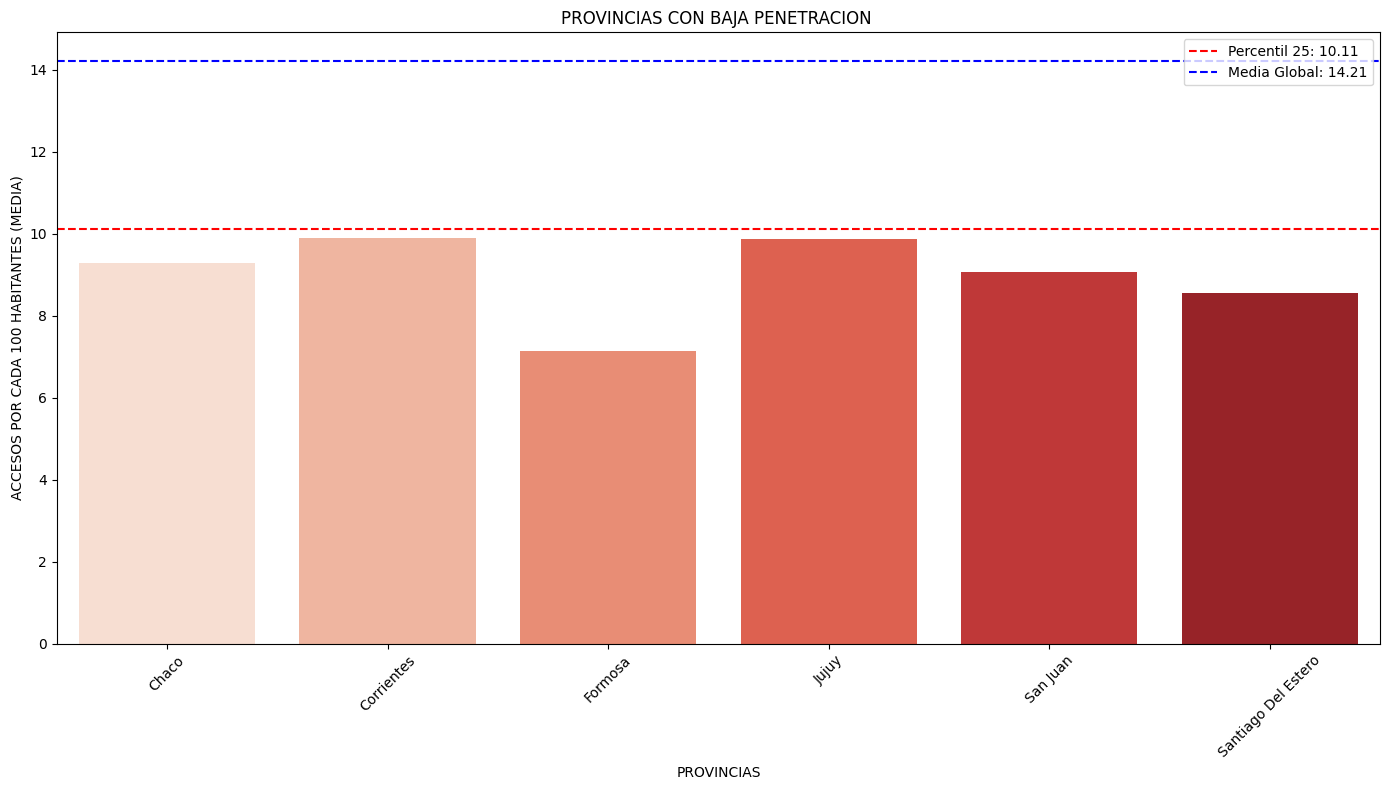

In [41]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Provincia', y='mean', data=provincias_baja_penetracion, palette='Reds')

plt.axhline(y=percentil_25, color='red', linestyle='--', label=f'Percentil 25: {percentil_25:.2f}')
plt.axhline(y=global_mean, color='blue', linestyle='--', label=f'Media Global: {global_mean:.2f}')

plt.xticks(rotation=45)
plt.title('PROVINCIAS CON BAJA PENETRACION ')
plt.xlabel('PROVINCIAS')
plt.ylabel('ACCESOS POR CADA 100 HABITANTES (MEDIA)')
plt.legend()
plt.tight_layout()

plt.show()

*Conclusiones:*

- Las provincias Chaco, Corrientes, Formosa, Jujuy, San Juan y Santiago del Estero tienen una media de accesos por cada 100 habitantes significativamente por debajo de la media global (14.21 accesos). Estas provincias también se encuentran cerca o por debajo del percentil 25 (10.11 accesos), lo cual sugiere que se encuentran en la parte inferior del rango de penetración en comparación con el resto del país.

- Estas provincias representan áreas con baja penetración que podrían ser priorizadas para expansión de infraestructura y mejora de servicios. Específicamente, Formosa y Santiago del Estero tienen la menor penetración, con valores alrededor de 7 accesos por cada 100 habitantes, lo cual indica que estas provincias tienen una infraestructura muy limitada o una baja adopción de servicios de Internet.

- Las provincias mencionadas están, en promedio, un 30% a 50% por debajo de la media global, lo que resalta una clara oportunidad para intervenir y reducir la brecha digital en estas regiones.

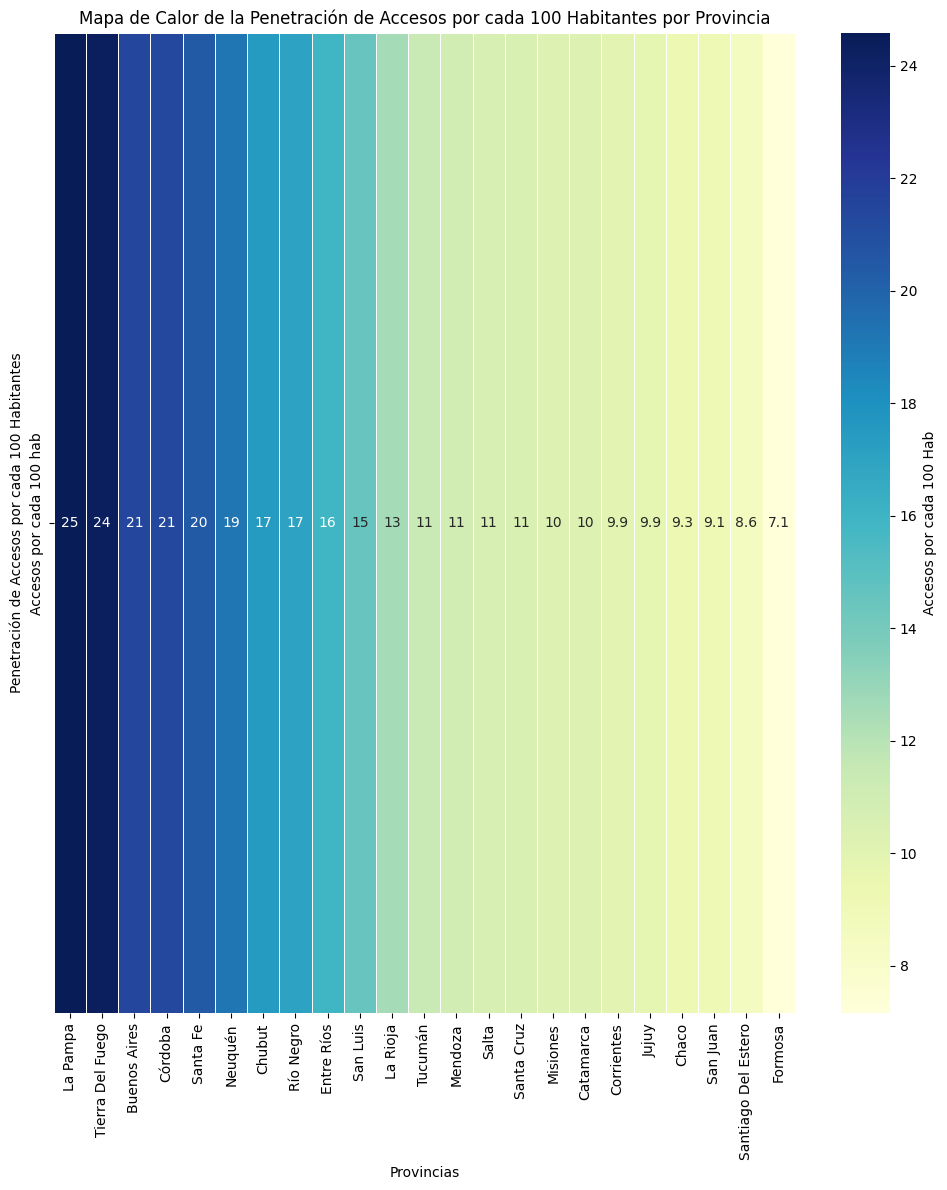

In [42]:
metricas  = hoja_ocho_sin_outliers.groupby('Provincia')['Accesos por cada 100 hab'].mean().reset_index()

metricas  = metricas.sort_values(by='Accesos por cada 100 hab', ascending=False)

plt.figure(figsize=(10, 12))  

heatmap = sns.heatmap(metricas.set_index('Provincia').T, 
                      annot=True, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Accesos por cada 100 Hab'})

plt.title('Mapa de Calor de la Penetración de Accesos por cada 100 Habitantes por Provincia')
plt.xlabel('Provincias')
plt.ylabel('Penetración de Accesos por cada 100 Habitantes')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

*Conclusiones:*

- Provincias como Formosa, Santiago del Estero, y San Juan se destacan visualmente como las regiones con menor penetración (valores entre 7 y 10 accesos por cada 100 habitantes).
- Provincias como La Pampa, Tierra del Fuego, y Buenos Aires tienen la mayor penetración (entre 21 y 25 accesos por cada 100 habitantes), indicando que estas regiones están más desarrolladas en términos de infraestructura de Internet. La alta penetración en estas provincias contrasta con las provincias de baja penetración, indicando disparidades significativas en el acceso a tecnología entre las distintas regiones.
- El mapa de calor sugiere que la penetración de accesos es considerablemente mayor en las provincias del centro y sur del país, mientras que las provincias del norte y noroeste (como Jujuy, Formosa y Chaco) tienen menor acceso.
- Este patrón podría estar relacionado con factores socioeconómicos y de infraestructura, indicando que estas provincias del norte requieren más atención para cerrar la brecha digital. 

*Recomendaciones:*

- Formosa, Santiago del Estero, Chaco, Corrientes, Chaco y San Juan deberían ser las provincias de alta prioridad para la empresa en términos de expansión de infraestructura y servicios, dado que tienen los menores niveles de penetración por cada 100 habitantes.
- La baja penetración en estas provincias sugiere que hay una gran oportunidad de crecimiento para aumentar la adopción de servicios de Internet.
- La empresa podría enfocarse en mejorar el acceso en las provincias de baja penetración para aumentar su participación en el mercado y contribuir a la reducción de la brecha digital.
- Una posible estrategia podría ser el desarrollo de infraestructura de fibra óptica o servicios inalámbricos para cubrir las zonas rurales o de difícil acceso en estas provincias.
- Las diferencias entre el norte y el sur del país indican la necesidad de una estrategia regional diferenciada. El sur y el centro tienen una mayor penetración de accesos, por lo que podrían enfocarse en estrategias de retención y mejora de calidad, mientras que el norte requeriría una inversión inicial para aumentar la conectividad básica.
- Dado que algunas provincias presentan una penetración extremadamente baja (por ejemplo, Formosa con 7 accesos por cada 100 habitantes), sería útil investigar factores específicos que estén limitando el crecimiento en estas regiones. Factores como infraestructura, nivel socioeconómico, y políticas locales podrían estar influyendo en la adopción de tecnología.

**Análisis del tercer aspecto detallado:**

*Analizar el crecimiento o disminución de accesos por tecnología en distintos años.*

Voy a utilizar el Dataframe creado anteriormente con la hoja 7 del Dataset "Internet".

In [47]:
import pandas as pd

In [82]:
#Hoja 7
hoja_siete = pd.read_excel(dataset_internet, sheet_name=6)
hoja_siete.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


Voy a realizar búsqueda de nulos, duplicados y outliers.

In [90]:
hoja_siete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [91]:
# Verificar datos faltantes
print(hoja_siete.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


In [92]:
valores_nulos = hoja_siete[hoja_siete.isnull().any(axis=1)]
print("Filas con valores nulos:")
print(valores_nulos)

Filas con valores nulos:
     Año                                          Trimestre Provincia  ADSL  \
984  NaN                                                NaN       NaN   NaN   
985    *  Los datos provinciales no coinciden a nivel na...       NaN   NaN   

     Cablemodem  Fibra óptica  Wireless  Otros  Total  
984         NaN           NaN       NaN    NaN    NaN  
985         NaN           NaN       NaN    NaN    NaN  


In [93]:
print(hoja_siete.iloc[984,:])

Año             NaN
Trimestre       NaN
Provincia       NaN
ADSL            NaN
Cablemodem      NaN
Fibra óptica    NaN
Wireless        NaN
Otros           NaN
Total           NaN
Name: 984, dtype: object


In [94]:
print(hoja_siete.iloc[985,:])

Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                     NaN
ADSL                                                          NaN
Cablemodem                                                    NaN
Fibra óptica                                                  NaN
Wireless                                                      NaN
Otros                                                         NaN
Total                                                         NaN
Name: 985, dtype: object


Dado que son dos filas totalmente vacías voy a eliminarlas.

In [95]:
# Eliminar todas las filas que contengan al menos un valor nulo
hoja_siete = hoja_siete.dropna()

print(hoja_siete.isnull().sum())

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64


In [96]:
duplicados_totales = hoja_siete.duplicated().sum()
print(f"Cantidad de filas duplicadas en el DataFrame: {duplicados_totales}")

Cantidad de filas duplicadas en el DataFrame: 0


No existen valores duplicados.

Hay algunas filas que en las primeras dos columnas contienen asteriscos. Voy a eliminarlos.

In [97]:
hoja_siete.iloc[438,:]

Año                 2019 *
Trimestre              3 *
Provincia       Corrientes
ADSL               53344.0
Cablemodem         50230.0
Fibra óptica        1888.0
Wireless            2458.0
Otros               4839.0
Total             112759.0
Name: 438, dtype: object

In [105]:
hoja_siete_copia = hoja_siete.copy()

print("Tipos de datos antes de la limpieza:")
print(hoja_siete_copia.dtypes)

print("\nCantidad de valores nulos antes de la limpieza:")
print(hoja_siete_copia[['Año', 'Trimestre']].isnull().sum())

# Elimino asteriscos y espacios en blanco de las columnas 'Año' y 'Trimestre'
hoja_siete_copia['Año'] = hoja_siete_copia['Año'].astype(str).replace(to_replace=r'\*', value='', regex=True).str.strip()
hoja_siete_copia['Trimestre'] = hoja_siete_copia['Trimestre'].astype(str).replace(to_replace=r'\*', value='', regex=True).str.strip()

# Convierto los valores vacíos en las columnas a NaN para facilitar el manejo posterior
hoja_siete_copia['Año'].replace('', pd.NA, inplace=True)
hoja_siete_copia['Trimestre'].replace('', pd.NA, inplace=True)

# Verifico la limpieza y los tipos de datos
print("\nTipos de datos después de la limpieza:")
print(hoja_siete_copia.dtypes)

# Convierto a tipo numérico
hoja_siete_copia['Año'] = pd.to_numeric(hoja_siete_copia['Año'], errors='coerce')
hoja_siete_copia['Trimestre'] = pd.to_numeric(hoja_siete_copia['Trimestre'], errors='coerce')


Tipos de datos antes de la limpieza:
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Cantidad de valores nulos antes de la limpieza:
Año          0
Trimestre    0
dtype: int64

Tipos de datos después de la limpieza:
Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object


In [106]:
hoja_siete_copia.iloc[486,:]

Año                   2019
Trimestre                1
Provincia       Corrientes
ADSL               55842.0
Cablemodem         43444.0
Fibra óptica        1615.0
Wireless            1528.0
Otros                 58.0
Total             102487.0
Name: 486, dtype: object

Voy a modificar el tipo de datos de las columnas donde están las tecnologías a tipo entero para que me sirva para el Dashboard. Están en tipo float pero tienen como cifra decimal después de la coma un cero, por lo que es conveniente que esten en tipo entero.

In [117]:
columnas_a_convertir = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']  # Lista de columnas a convertir
hoja_siete_copia[columnas_a_convertir] = hoja_siete_copia[columnas_a_convertir].astype(int)

In [118]:
hoja_siete_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           984 non-null    int64 
 1   Trimestre     984 non-null    int64 
 2   Provincia     984 non-null    object
 3   ADSL          984 non-null    int64 
 4   Cablemodem    984 non-null    int64 
 5   Fibra óptica  984 non-null    int64 
 6   Wireless      984 non-null    int64 
 7   Otros         984 non-null    int64 
 8   Total         984 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 76.9+ KB


**El análisis del último Dataframe no ha sido terminado por cuestiones de tiempo.**

Voy a exportar a formato CSV los Dataframes para utilizarlos para el modelo y crear el Dashboard.

In [56]:
# Exporto el DataFrame con codificación 'utf-8-sig' para evitar problemas de lectura en Power BI
hoja_tres_copia.to_csv('accesos_tecnologia_provincias.csv', index=False, encoding='utf-8-sig')

In [120]:
hoja_siete_copia.to_csv('accesos_tecnologia_años.csv', index=False, encoding='utf-8-sig')

In [58]:
hoja_ocho_sin_outliers.to_csv('penetracion_provincias_sin_outliers.csv', index=False, encoding='utf-8-sig')

In [59]:
hoja_ocho.to_csv('penetracion_provincias_con_outliers.csv', index=False, encoding='utf-8-sig')